In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

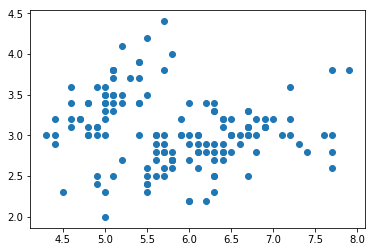

In [2]:
iris = datasets.load_iris()
features = iris.data
plt.scatter(features[:,0], features[:,1])
plt.show()

In [3]:
scaler = StandardScaler()
features_standarrdized = scaler.fit_transform(features)

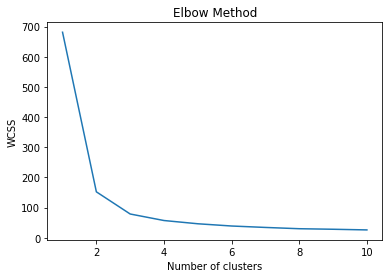

In [4]:
from sklearn.metrics import silhouette_samples,silhouette_score
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

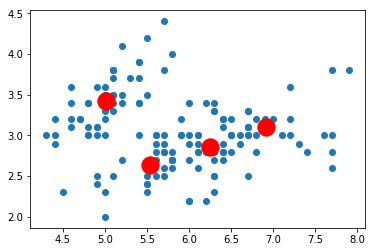

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
plt.scatter(features[:,0],features[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

In [6]:
# Import Library yang dibutuhkan
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [7]:
# baca datset dari file
datasetPath = "data.txt"
dataset = np.loadtxt(datasetPath, delimiter = " ")

# mendefinisikan parameter kmeans klustering
k = 2 # jumlah klaster yang diinginkan
iterationCounter = 0 # counter untuk iterasi
input = dataset # input data
# fungsi untuk inisialisasi titik pusat klaster (random)
def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace = False)]
    return result

In [8]:
# fungsi untuk plot hasil klaster per iterasi
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:,1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(), 
                    c=col, label="centroid-" + str(i+1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block = True)

In [9]:
# fungsi utama algoritma kmeans
def kMeans(data, centroidInit):
    nCluster = k #banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # looping hingga konvergen
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0],0))
        # ulangi proses untuk semua klaster
        for i in range (0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data, centroidRepeated))
            # hitung jarak Eulidean
            euclideanMatrix=np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster,euclideanMatrix),axis=1)
        # tempatkan data ke klaster yang jarak Eulideannya paling dekat
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster),axis=1))
        listClusterMember = [[]for i in range(k)]
        for i in range(0, data.shape[0]):
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        # hitung titik pusat klaster terbaru
        newCentroid =np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range (0, nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ",iterationCounter)
        print("centroid: ",newCentroid)
        # break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat klaster dengan nilai yang baru
        centroidInit = newCentroid
        # plot hasil klaster per iterasi
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter),0)
        time.sleep(1) # diberi jeda 1 detik agar hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

('iter: ', 1)
('centroid: ', matrix([[-5.13150667,  0.63287067],
        [ 4.68504458, -1.33266627]]))


AttributeError: 'itertools.cycle' object has no attribute '__next__'

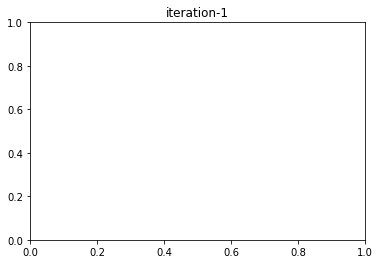

In [10]:
# panggil fungsi inisialisasi klaster
centroidInit = initCentroid(input, k)
# panggil semua fungsi kmeans
clusterResults, centroid = kMeans(input, centroidInit)
# plot hasil final klaster setelah konvergen
plotClusterResult(clusterResults, centroid, str(iterationCounter) + "(converged)", 1)

In [ ]:
# Import Library yang akan digunakan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# menyiapkan data dan memanggil dataset
dataset = pd.read_csv('konsumen.csv')
dataset.keys()

In [ ]:
data = pd.DataFrame(dataset)
data.head()

In [ ]:
# Konversi dataset ke data array
X = np.asarray(dataset)
print(X)

In [ ]:
# Menampilkan data array kedalam scatter plot
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel('Gaji')
plt.ylabel('pengeluaran')
plt.title('grafik penyebaran data konsumen')
plt.show

In [ ]:
# mengaktifkan kmeans dengan jumlah k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

In [ ]:
# menampilkan nilai centroid yang digenerate oleh algoritma
print(kmeans.cluster_centers_)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="rainbow")
plt.xlabel('Gaji')
plt.ylabel('pengeluaran')
plt.title('Grafik hasil klastering data gaji dan pengeluaran konsumen')
plt.show

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Gaji')
plt.ylabel('pengeluaran')
plt.title('Grafik hasil klastering data gaji dan pengeluaran konsumen')
plt.show